# Time Series data 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr
import pandas_datareader as data_reader
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (12, 5)

#한글 폰트 사용
import platform
from matplotlib import font_manager
 
if platform.system() == "Darwin":  #Mac
    plt.rc('font', family='AppleGothic')
else:
    font_path = 'C:/Windows/Fonts/malgun.ttf' # For Windows 
    font_name = font_manager.FontProperties(fname=font_path).get_name()  
    plt.rc('font', family=font_name)                           

plt.rcParams['axes.unicode_minus'] = False  #한글사용시 마이너스 사인 깨짐 방지

### 원달러 환율 시각화

- FRED(Federal Reserve Economic Data) 에서 원달러 환율 가져오기

`DEXKOUS` - South Korea Won-Dollar 환율

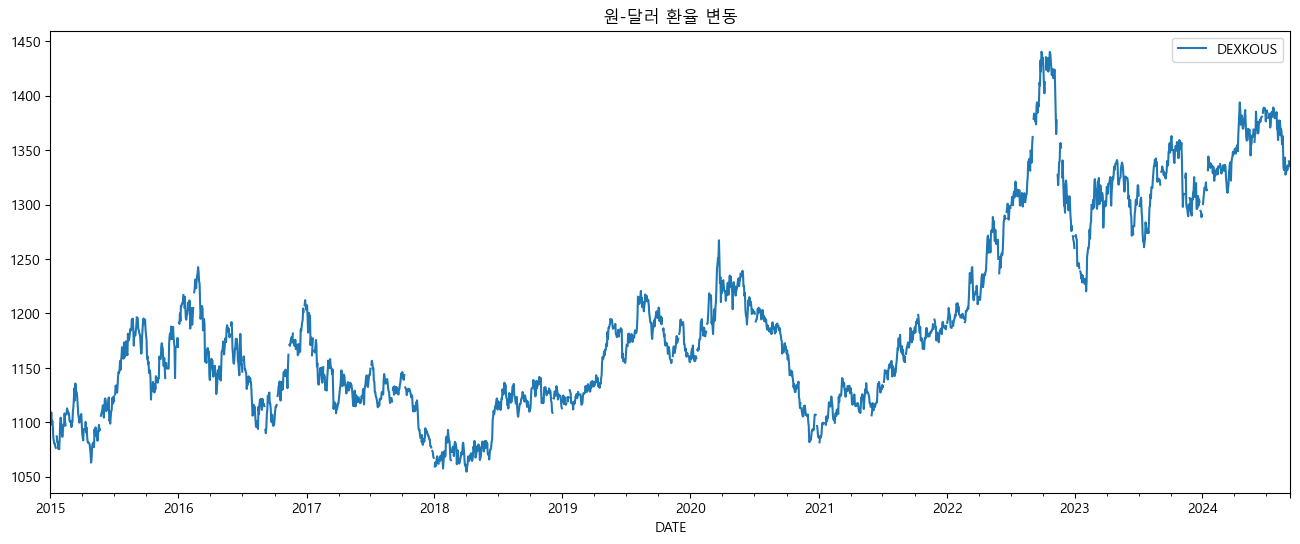

In [34]:
import pandas_datareader as data_reader

# FRED에서 'DEXKOUS' 데이터를 2015-01-01부터 불러옵니다 (원-달러 환율 데이터).
df = data_reader.DataReader('DEXKOUS', 'fred', '2015-01-01')

df.plot(figsize=(16, 6))
plt.title("원-달러 환율 변동")
plt.show()

## cufflinks 로 candle chart 그리기

cufflinks라이브러리 자체에서 plotly 와 연동이 되어서 예쁘고 쉽게 그래프를 그릴 수 있다.

In [35]:
# pip install cufflinks

import cufflinks as cf  # cufflinks는 pandas 데이터프레임과 plotly를 결합해주는 라이브러리입니다.
from plotly.offline import iplot, init_notebook_mode  # 오프라인 모드에서 plotly 그래프를 그리기 위한 모듈들

# 설정을 한번만 실행합니다.
# world_readable=True는 생성된 그래프가 다른 사람과 공유될 수 있음을 의미합니다.
# theme='pearl'은 그래프의 테마를 진주 색상으로 설정합니다.
# offline=True는 오프라인에서 그래프를 표시할 수 있게 합니다.
cf.set_config_file(world_readable=True, theme='pearl', offline=True)

# 노트북 환경에서 그래프가 표시될 수 있도록 초기화합니다.
init_notebook_mode()

`df.iplot` : plotly chart 그리기  
- shape : figure의 shape  
- default plot : line chart

In [36]:
# 삼성전자 주가
df = fdr.DataReader("005930", "2019-01-01")
df.head(2)

Open   High    Low  Close    Volume    Change
Date                                                      
2019-01-02  39400  39400  38550  38750   7847664  0.001292
2019-01-03  38300  38550  37450  37600  12471493 -0.029677

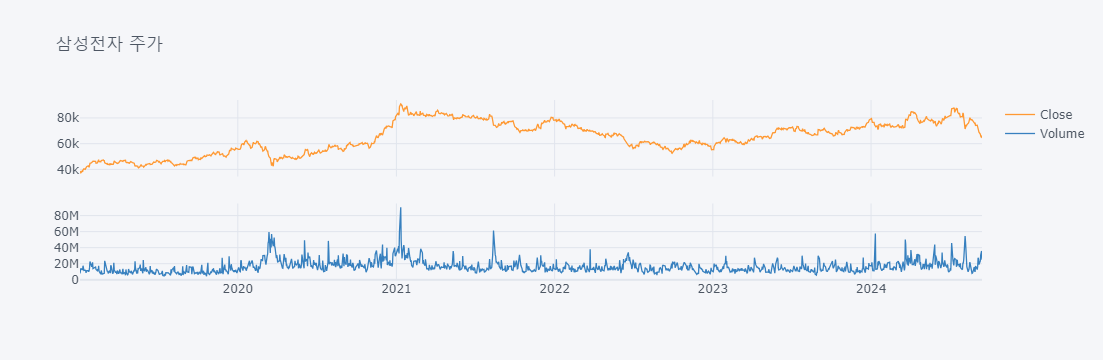

In [5]:
df[['Close', 'Volume']].iplot(subplots=True, shape=(2,1), 
                        shared_xaxes=True, title='삼성전자 주가')

candle stick 생성 

- EMA : Exponential Moving Average. 
- SMA : Simple Moving Average

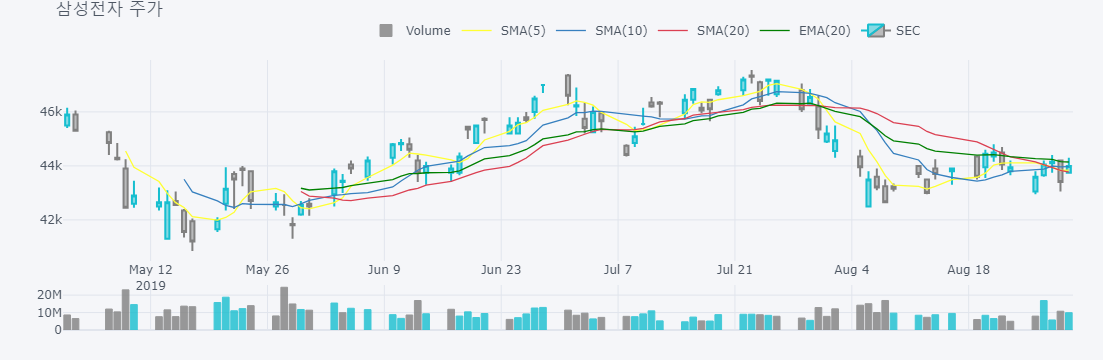

In [37]:
# 노트북 환경에서 plotly 그래프가 정상적으로 표시될 수 있도록 초기화합니다.
init_notebook_mode()

# 데이터프레임에서 2019-05-01부터 2019-08-31까지의 데이터를 선택합니다.
df = df['2019-05-01':'2019-08-31']

# QuantFig 객체를 생성합니다. 삼성전자 주가 데이터를 시각화하기 위한 객체입니다.
# title은 그래프의 제목, legend는 범례의 위치, name은 그래프의 이름입니다.
qf = cf.QuantFig(df, title="삼성전자 주가", legend='top', name='SEC')

# 주가 그래프에 거래량 데이터를 추가합니다.
qf.add_volume()

# 5일 단순 이동평균선(SMA)을 추가합니다. 노란색으로 표시됩니다.
qf.add_sma(periods=5, column="Close", color="yellow")

# 10일 단순 이동평균선(SMA)을 추가합니다. 파란색으로 표시됩니다.
qf.add_sma(periods=10, column="Close", color="blue")

# 20일 단순 이동평균선(SMA)을 추가합니다. 빨간색으로 표시됩니다.
qf.add_sma(periods=20, column="Close", color="red")

# 20일 지수 이동평균선(EMA)을 추가합니다. 초록색으로 표시됩니다.
qf.add_ema(periods=20, color='green')

# 인터랙티브한 그래프를 표시합니다.
qf.iplot()

# 시각화를 통한 주식 시장의 변동 장기 분석
- 역사적 바닥, 천장 시각화  
- 미국, 한국 시장, 금리 비교  
- 비트코인 추세 시각화

- 1970 년대 이후의 다우 존수 종합 지수 변동 시각화

In [38]:
# 파일을 읽어옵니다. 첫 번째 열을 인덱스로 사용하고, 날짜를 파싱하여 datetime 형식으로 변환합니다.
dji1 = pd.read_csv('data/DJI_1970.csv', index_col=0, parse_dates=True)

dji1.head(2)

Open   High    Low  Close   Volume
Date                                           
1970-01-02  800.4  813.6  797.3  809.2   907895
1970-01-05  809.2  819.2  804.8  811.3  1295865

In [39]:
dji1.tail(2)

Open      High       Low     Close     Volume
Date                                                         
2022-01-18  35661.76  35661.76  35262.02  35368.47  490284707
2022-01-19  35412.30  35547.83  35015.49  35028.65  443221700

In [40]:
# 다우존스 지수("^DJI") 데이터를 2022년 1월 21일부터 불러옵니다.
dji2 = fdr.DataReader("^DJI", start='20220121')

dji2.head(2)

Open          High           Low         Close     Volume  \
2022-01-20  35102.660156  35490.199219  34670.121094  34715.390625  369070000   
2022-01-21  34701.691406  34896.671875  34229.550781  34265.371094  523880000   

               Adj Close  
2022-01-20  34715.390625  
2022-01-21  34265.371094

In [41]:
# 두 개의 데이터프레임 dji1과 dji2를 위아래로(concat) 결합합니다.
# dji1은 과거 데이터(1970년부터), dji2는 최근 데이터(2022년부터)입니다.
dji = pd.concat([dji1, dji2])

dji.head(2)

Open   High    Low  Close   Volume  Adj Close
1970-01-02  800.4  813.6  797.3  809.2   907895        NaN
1970-01-05  809.2  819.2  804.8  811.3  1295865        NaN

In [42]:
dji.tail(2)

Open          High           Low         Close     Volume  \
2024-09-12  40862.109375  41107.351562  40665.531250  41096.769531  289300000   
2024-09-13  41153.699219  41533.839844  41128.699219  41393.781250  276800000   

               Adj Close  
2024-09-12  41096.769531  
2024-09-13  41393.781250

In [43]:
# 파일을 읽어옵니다. 첫 번째 줄은 헤더로 간주되며, 열 이름을 'date'와 'rate'로 지정합니다.
bond = pd.read_csv('data/FRED_rate_2Y.csv', names=['date', 'rate'], header=0)

# 'date' 열을 datetime 형식으로 변환하여 날짜 데이터를 처리할 수 있도록 합니다.
bond['date'] = pd.to_datetime(bond['date'])

# 'date' 열을 데이터프레임의 인덱스로 설정하여 날짜를 기준으로 데이터에 접근할 수 있도록 합니다.
bond.set_index('date', inplace=True)

bond.head(2)

rate
date            
1976-06-01  7.26
1976-06-02  7.23

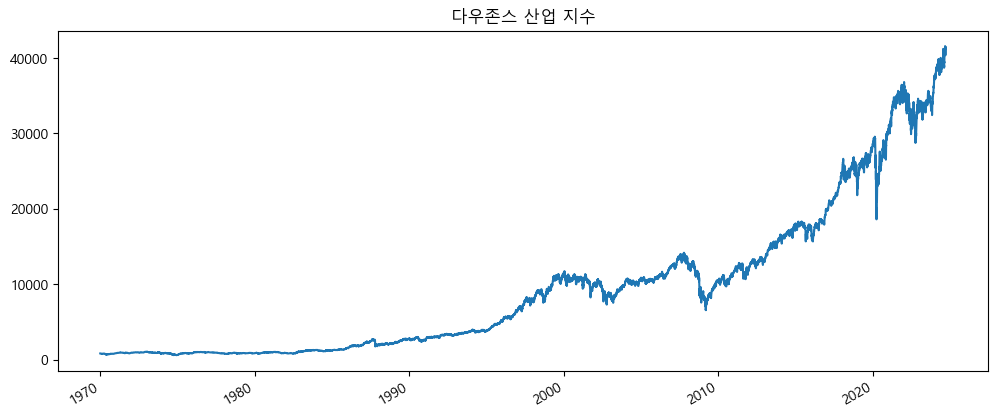

In [45]:
# 다우존스 산업 지수에서 'Close' 열(종가)을 그래프로 플로팅합니다.
dji['Close'].plot()

plt.title("다우존스 산업 지수")
plt.show()

가격의 변화가 큰 경우 y 축을 log scale로 취하면 실제 가격 변동률의 착시 현상을 없앨 수 있다. (같은 등락률이 같은 길이로 표현)

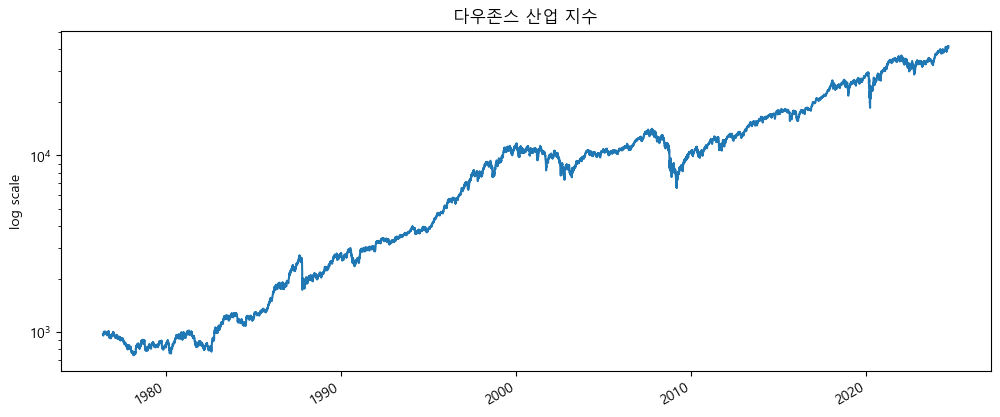

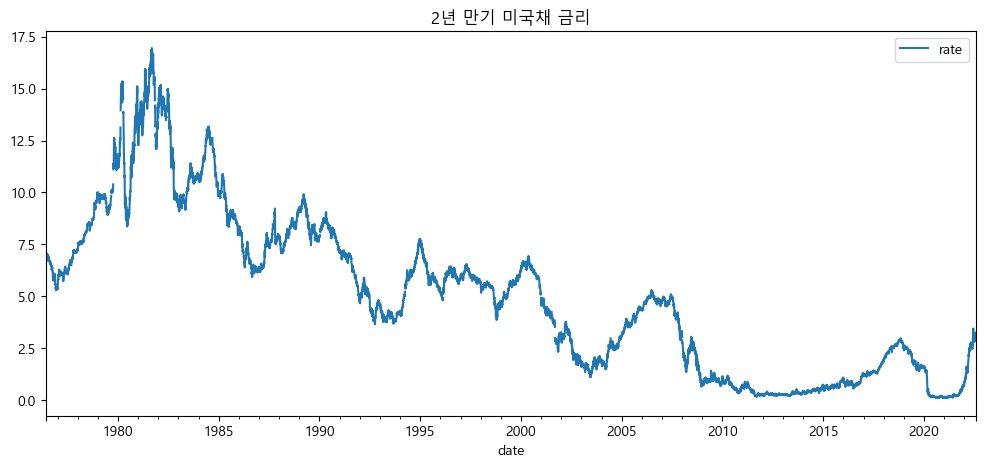

In [46]:
fig = plt.figure()

# 1행 1열짜리 서브플롯을 추가합니다.
ax = fig.add_subplot(1, 1, 1)

# 다우존스 산업 지수의 1976년 6월 이후의 'Close' 데이터를 서브플롯에 플로팅합니다.
dji['1976-06':]['Close'].plot(ax=ax)

# y축 스케일을 로그(log) 스케일로 설정합니다.
ax.set_yscale('log')

# 서브플롯의 제목을 "다우존스 산업 지수"로 설정합니다.
ax.set_title("다우존스 산업 지수")

# y축 레이블을 'log scale'로 설정합니다.
ax.set_ylabel('log scale')

# 2년 만기 미국채 금리 데이터를 별도로 플로팅합니다.
bond.plot()

# 그래프의 제목을 "2년 만기 미국채 금리"로 설정합니다.
plt.title("2년 만기 미국채 금리")

plt.show()

### 1973~74년 1차 오일 쇼크
- 1979년 이란 혁명. 전세계적으로 물가는 상승하면서 실업 등의 문제는 오히려 심각해지는 스태그플레이션이 나타났으며, 미국의 FRB는 급작스럽게 불어난 달러를 미국 은행으로 회수하기 위해 금리를 21%까지 인상

In [47]:
# 2년 만기 미국채 금리 데이터(bond)에서 1976년 6월 1일부터 1985년 12월 31일까지의 데이터를 선택합니다.
df = bond.loc['1976-06-01':'1985-12-31']

df.head(2)

rate
date            
1976-06-01  7.26
1976-06-02  7.23

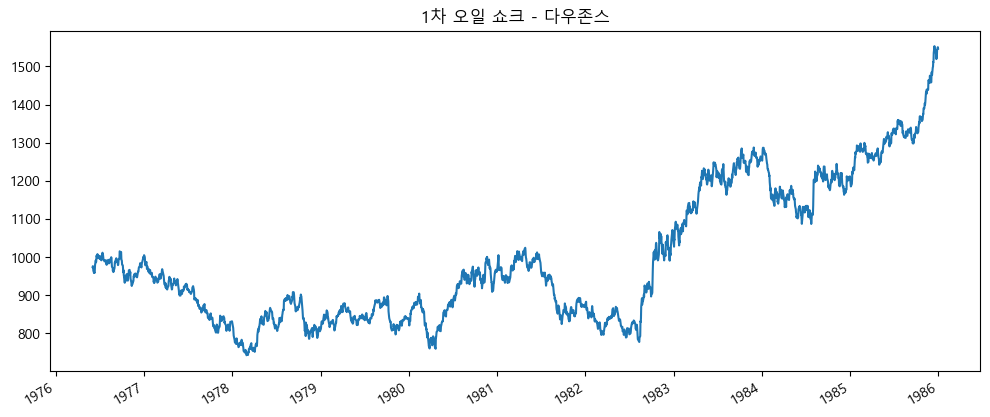

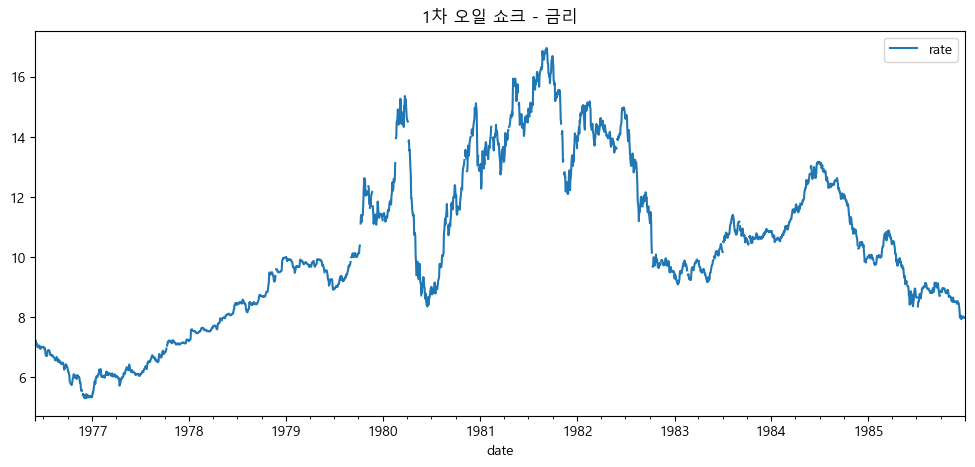

In [48]:
# 1976년 6월 1일부터 1985년 12월 31일까지의 다우존스 공업평균 지수(Close)를 선택합니다.
series = dji.loc['1976-06-01':'1985-12-31']['Close']

# 다우존스 공업평균 지수를 플로팅하고, label을 "다우존스 공업평균 지수"로 설정합니다.
series.plot(label="다우존스 공업평균 지수")

# 그래프의 제목을 "1차 오일 쇼크 - 다우존스"로 설정합니다.
plt.title("1차 오일 쇼크 - 다우존스")

# 1976년 6월 1일부터 1985년 12월 31일까지의 10년 만기 미국채 금리 데이터를 플로팅하고, label을 "10년 만기 US Bond 금리"로 설정합니다.
df.plot(label='10년 만기 US Bond 금리')

plt.title("1차 오일 쇼크 - 금리")
plt.legend()
plt.show()

In [49]:
# 다우존스 공업평균 지수에서 최고점을 출력합니다.
# idxmax()는 최고점이 발생한 날짜를, max()는 해당 날짜의 지수 값을 반환합니다.
print("최고점", series.idxmax(), series.max())

# 다우존스 공업평균 지수에서 최저점을 출력합니다.
# idxmin()은 최저점이 발생한 날짜를, min()은 해당 날짜의 지수 값을 반환합니다.
print("최저점", series.idxmin(), series.min())

# 최대값과 최저값을 이용하여 최대 하락폭(Drawdown)을 계산하고, 소수점 첫째 자리까지 출력합니다.
# Drawdown = (최고점 - 최저점) / 최고점 * 100으로 계산됩니다.
print("Drawdown {:.1f}%".format((series.max() 
                     - series.min()) / series.max() * 100))

최고점 1985-12-16 00:00:00 1553.1
최저점 1978-02-28 00:00:00 742.1
Drawdown 52.2%


### Dow Jones 1974 년 바닥 이후 V자 급등

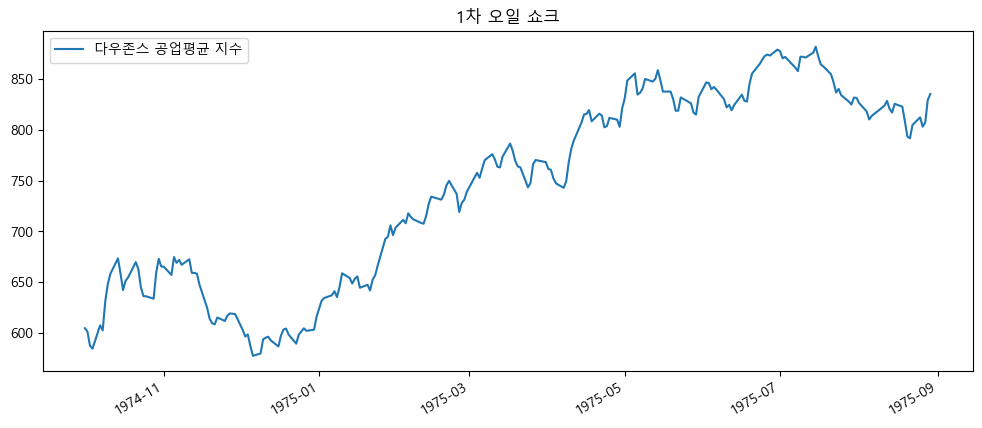

In [50]:
# 1974년 10월 1일부터 1975년 8월 31일까지의 다우존스 공업평균 지수(Close)를 선택합니다.
series = dji.loc['1974-10-01':'1975-08-31']['Close']

# 다우존스 공업평균 지수를 플로팅하고, label을 "다우존스 공업평균 지수"로 설정합니다.
series.plot(label="다우존스 공업평균 지수")

plt.title("1차 오일 쇼크")
plt.legend()
plt.show()

In [51]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("상승폭 {:.1f}%".format((series.max() 
                            - series.min())/series.min()*100))

최고점 1975-07-15 00:00:00 881.8
최저점 1974-12-06 00:00:00 577.6
상승폭 52.7%


### dot-com bubble (2000 년 3월)
- 인터넷 관련 분야가 성장하면서 산업 국가의 주식 시장이 지분 가격의 급속한 상승을 본 1995년부터 닷컴 버블이 붕괴된 2001년까지 걸친 거품 경제 현상

### 버블 붕괴 시의 다우존스 지수 하락

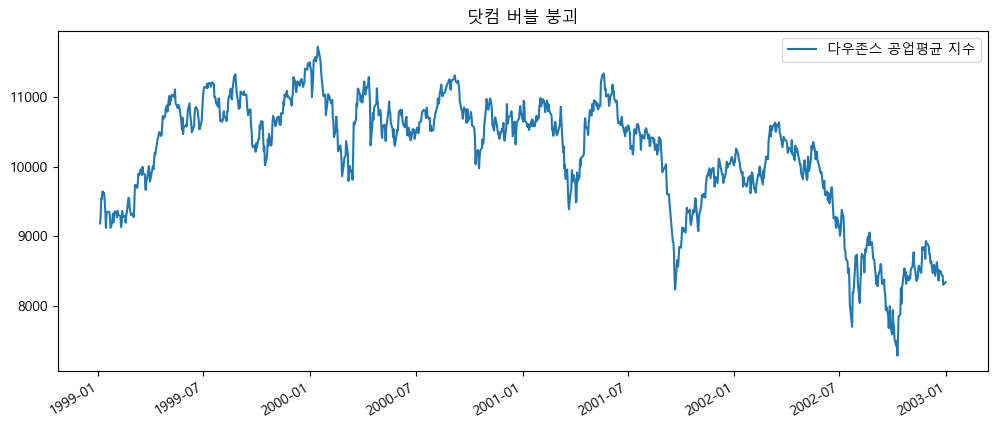

In [20]:
series = dji.loc['1999-01':'2002-12']['Close']
series.plot(label="다우존스 공업평균 지수")
plt.title("닷컴 버블 붕괴");
plt.legend();

In [21]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("Drawdown {:.1f}%".format((series.max() 
                                 - series.min())/series.max()*100))

최고점 2000-01-14 00:00:00 11723.0
최저점 2002-10-09 00:00:00 7286.27
Drawdown 37.8%


### 2000 년 3월 dot-com bubble의 Nasdaq 붕괴
1) 3/7 거래량이 크게 증가하며 하락  
2) 3/10 오전장에서만 85 포인트 뛰어 오르며 사상 최고치 경신. 오후에 급락하여 불과 2 포인트 상승으로 마감.  거래량은 평균치 보다 13%나 많음. stall day (기관이 팔고 있다는 표시)  
3) 3/14 대량 거래와 함께 4%나 하락  
4) 3/16~24 까지 상승세. 랠리가 다시 시작되는 것 아닌가 하는 착각을 불러 일으킴.  
5) 4번째 매물 출회되며 상승세에 찬물을 끼얹음.  stall day.  
6) 5번째 매물 출회

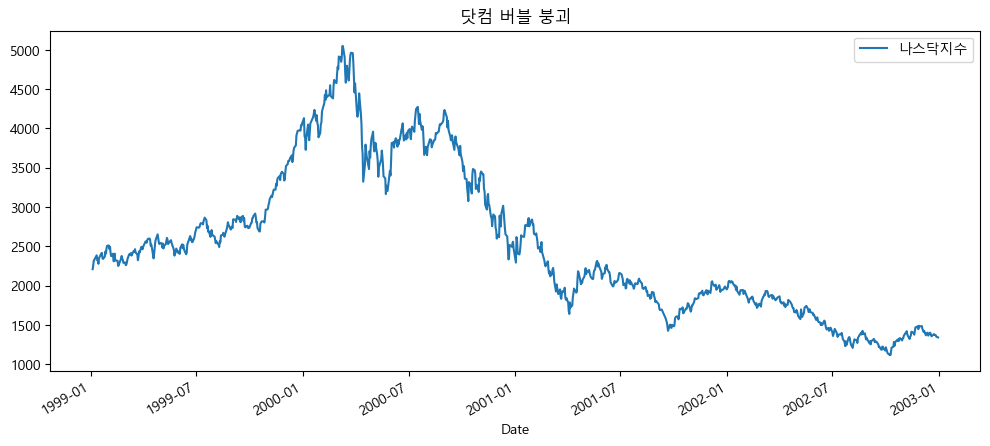

In [22]:
df = yf.download('^IXIC', start='1999-01-01', end='2002-12-31', 
                 progress=False)
series = df['Close']
series.plot(label="나스닥지수")
plt.title("닷컴 버블 붕괴")
plt.legend();

In [23]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("Drawdown {:.1f}%".format((series.max() 
                                 - series.min())/series.max()*100))

최고점 2000-03-10 00:00:00 5048.6201171875
최저점 2002-10-09 00:00:00 1114.1099853515625
Drawdown 77.9%


### Nasdaq 지수의 2003 년 바닥 확인 후 V자 상승

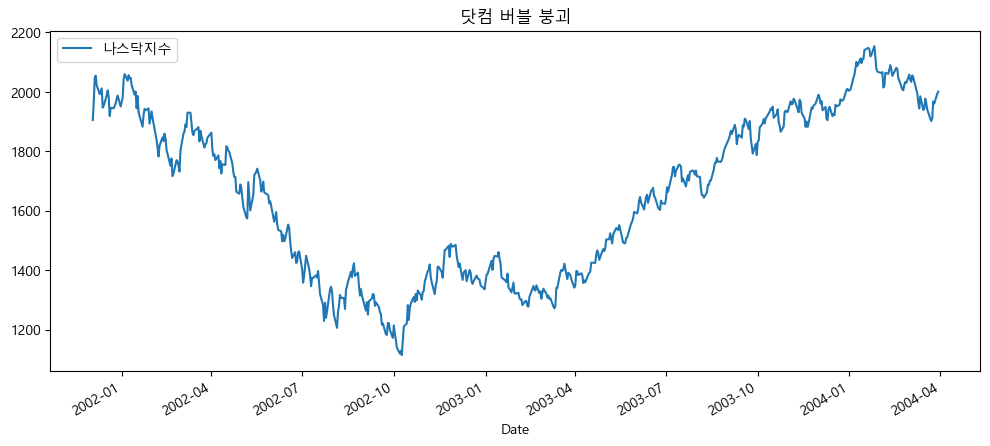

In [24]:
df = yf.download('^IXIC', start='2001-12-01', end='2004-03-31', 
                 progress=False)
series = df['Close']
series.plot(label="나스닥지수")
plt.title("닷컴 버블 붕괴")
plt.legend();

In [25]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("상승폭 {:.1f}%".format((series.max() 
                            - series.min())/series.min()*100))

최고점 2004-01-26 00:00:00 2153.830078125
최저점 2002-10-09 00:00:00 1114.1099853515625
상승폭 93.3%


### 금융위기 (2007 - 2010)
-  2007년 4월(서브프라임 모기지 사태) 또는 2008년 9월부터 미국에서 시작된 세계 규모의 경제 위기

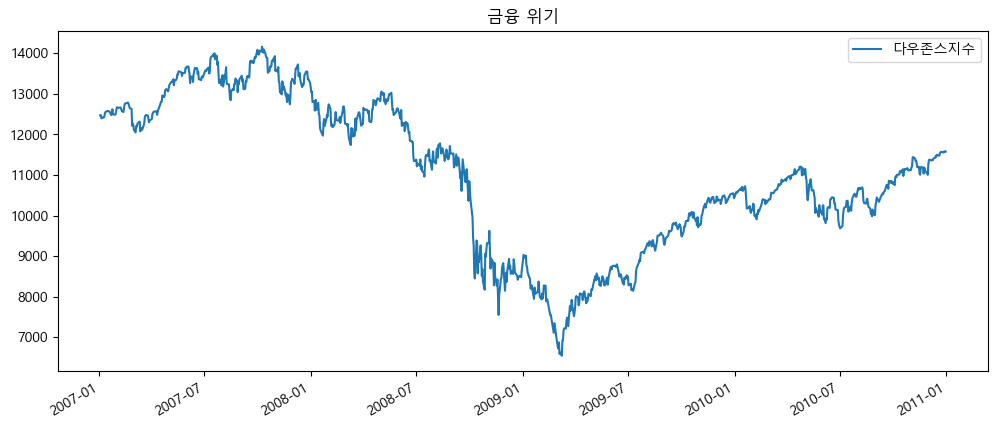

In [26]:
series = dji.loc['2007-01-02':'2010-12-31']['Close']
series.plot(label="다우존스지수")
plt.title("금융 위기");
plt.legend();

In [27]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("Drawdown {:.1f}%".format((series.max() 
                                 - series.min())/series.max()*100))

최고점 2007-10-09 00:00:00 14164.5
최저점 2009-03-09 00:00:00 6547.05
Drawdown 53.8%


### 2019년 코로나 팬데믹과 2022년의 하락세

- 2019년 12월 중국 우한에서 최초 발생  
- 한국 종합주가 지수와 비교

In [28]:
kospi = fdr.DataReader("^KS11", start='2018-12-01', end='2020-04-01')
kospi.head(2)

Open         High          Low        Close  Volume  \
2018-12-03  2127.780029  2136.639893  2113.600098  2131.929932  436600   
2018-12-04  2125.669922  2128.939941  2105.449951  2114.350098  507500   

              Adj Close  
2018-12-03  2131.929932  
2018-12-04  2114.350098

In [29]:
nasdaq = fdr.DataReader("^IXIC", start='2018-12-01', end='2020-04-01')
nasdaq.head(2)

Open         High          Low        Close      Volume  \
2018-11-30  7279.299805  7332.790039  7255.680176  7330.540039  2547970000   
2018-12-03  7486.129883  7486.509766  7392.220215  7441.509766  2643150000   

              Adj Close  
2018-11-30  7330.540039  
2018-12-03  7441.509766

다우존스
최고점 2020-02-12 00:00:00 29551.42
최저점 2020-03-23 00:00:00 18591.93
Drawdown 37.1%

종합주가지수
최고점 2020-01-22 00:00:00 2267.25
최저점 2020-03-19 00:00:00 1457.6400146484375
Drawdown 35.7%

나스닥지수
최고점 2020-02-19 00:00:00 9817.1796875
최저점 2018-12-24 00:00:00 6192.919921875
Drawdown 36.9%


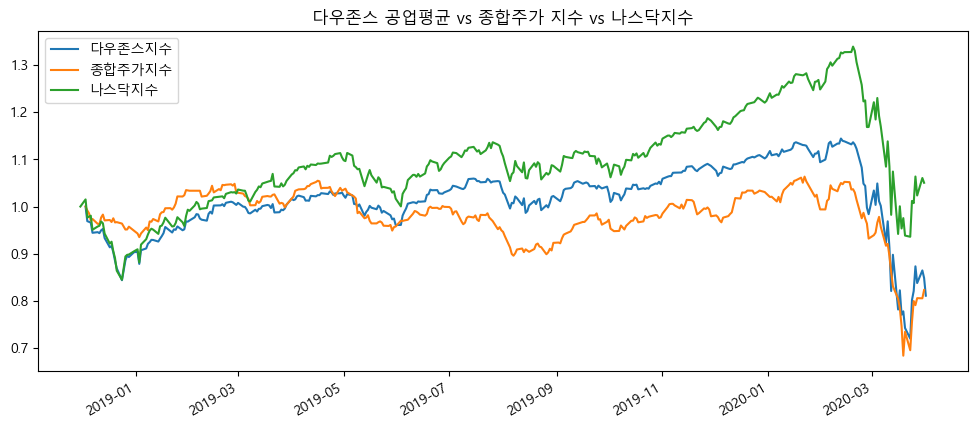

In [52]:
# 2018년 12월 1일부터 2020년 4월 1일까지의 다우존스 공업평균 지수(Close)를 선택합니다.
dj_series = dji.loc['2018-12-01':'2020-04-01']['Close']

# KOSPI 종합주가지수에서 'Close' 열을 선택합니다.
ko_series = kospi['Close'] 

# 나스닥 지수에서 'Close' 열을 선택합니다.
na_series = nasdaq['Close'] 

# 다우존스 지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series1 = dj_series / dj_series[0]

# 종합주가지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series2 = ko_series / ko_series[0]

# 나스닥 지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series3 = na_series / na_series[0]

# 다우존스 지수를 플로팅하고, label을 '다우존스지수'로 설정합니다.
series1.plot(label='다우존스지수')

# 종합주가지수를 플로팅하고, label을 '종합주가지수'로 설정합니다.
series2.plot(label='종합주가지수')

# 나스닥 지수를 플로팅하고, label을 '나스닥지수'로 설정합니다.
series3.plot(label='나스닥지수')

# 그래프의 제목을 "다우존스 공업평균 vs 종합주가 지수 vs 나스닥지수"로 설정합니다.
plt.title("다우존스 공업평균 vs 종합주가 지수 vs 나스닥지수")

# 그래프에 범례(legend)를 추가하여 플로팅된 라인의 레이블을 표시합니다.
plt.legend()

# 다우존스 지수의 최고점, 최저점 및 드로우다운(Drawdown) 출력
print("다우존스")
print("최고점", dj_series.idxmax(), dj_series.max())
print("최저점", dj_series.idxmin(), dj_series.min())
print("Drawdown {:.1f}%".format((dj_series.max() 
                                 - dj_series.min())/dj_series.max()*100))
print()

# 종합주가지수의 최고점, 최저점 및 드로우다운(Drawdown) 출력
print("종합주가지수")
print("최고점", ko_series.idxmax(), ko_series.max())
print("최저점", ko_series.idxmin(), ko_series.min())
print("Drawdown {:.1f}%".format((ko_series.max() 
                                 - ko_series.min())/ko_series.max()*100))
print()

# 나스닥 지수의 최고점, 최저점 및 드로우다운(Drawdown) 출력
print("나스닥지수")
print("최고점", na_series.idxmax(), na_series.max())
print("최저점", na_series.idxmin(), na_series.min())
print("Drawdown {:.1f}%".format((na_series.max() 
                                 - na_series.min())/na_series.max()*100))

### 2020년 양적 완화 이후의 주가 회복 

다우존스
최고점 2024-08-30 00:00:00 41563.078125
최저점 2020-03-23 00:00:00 18591.9296875
상승폭 123.6%

종합주가지수
최고점 2021-07-06 00:00:00 3305.2099609375
최저점 2020-03-19 00:00:00 1457.6400146484375
상승폭 126.8%

나스닥지수
최고점 2024-07-10 00:00:00 18647.44921875
최저점 2020-03-23 00:00:00 6860.669921875
상승폭 171.8%


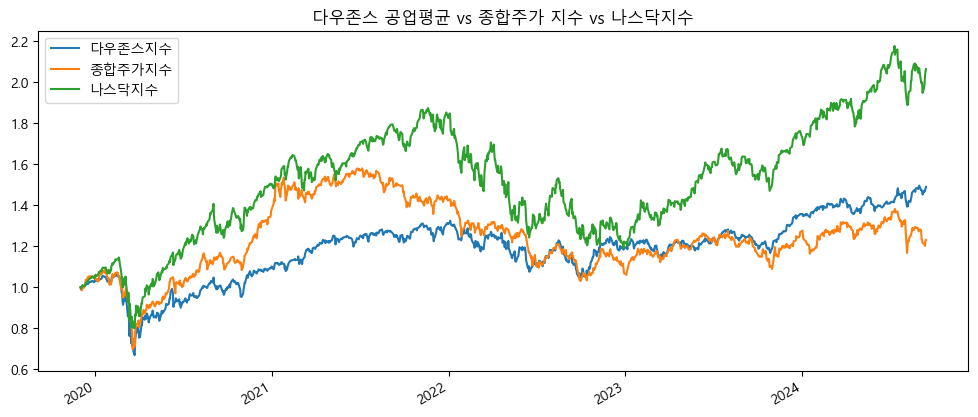

In [54]:
# 2019년 12월 1일부터 다우존스 지수('^DJI') 데이터를 불러옵니다.
df1 = fdr.DataReader('^DJI',  start='2019-12-01')

# 2019년 12월 1일부터 KOSPI 지수('^KS11') 데이터를 불러옵니다.
df2 = fdr.DataReader('^KS11', start='2019-12-01')

# 2019년 12월 1일부터 나스닥 지수('^IXIC') 데이터를 불러옵니다.
df3 = fdr.DataReader('^IXIC', start='2019-12-01')

# 각 지수의 'Close'(종가) 데이터를 선택합니다.
dj_series = df1['Close']
ko_series = df2['Close']
na_series = df3['Close']

# 다우존스 지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series1 = dj_series / dj_series[0]

# 종합주가지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series2 = ko_series / ko_series[0]

# 나스닥 지수를 기준으로 첫 번째 값으로 나누어 백분율로 변환합니다.
series3 = na_series / na_series[0]

# 다우존스 지수를 플로팅하고, label을 '다우존스지수'로 설정합니다.
series1.plot(label='다우존스지수')

# 종합주가지수를 플로팅하고, label을 '종합주가지수'로 설정합니다.
series2.plot(label='종합주가지수')

# 나스닥 지수를 플로팅하고, label을 '나스닥지수'로 설정합니다.
series3.plot(label='나스닥지수')

# 그래프의 제목을 "다우존스 공업평균 vs 종합주가 지수 vs 나스닥지수"로 설정합니다.
plt.title("다우존스 공업평균 vs 종합주가 지수 vs 나스닥지수")

# 그래프에 범례(legend)를 추가하여 플로팅된 라인의 레이블을 표시합니다.
plt.legend()

# 다우존스 지수의 최고점, 최저점 및 상승폭 출력
print("다우존스")
print("최고점", dj_series.idxmax(), dj_series.max())
print("최저점", dj_series.idxmin(), dj_series.min())
print("상승폭 {:.1f}%".format((dj_series.max() 
                            - dj_series.min())/dj_series.min()*100))
print()

# 종합주가지수의 최고점, 최저점 및 상승폭 출력
print("종합주가지수")
print("최고점", ko_series.idxmax(), ko_series.max())
print("최저점", ko_series.idxmin(), ko_series.min())
print("상승폭 {:.1f}%".format((ko_series.max() 
                            - ko_series.min())/ko_series.min()*100))
print()

# 나스닥 지수의 최고점, 최저점 및 상승폭 출력
print("나스닥지수")
print("최고점", na_series.idxmax(), na_series.max())
print("최저점", na_series.idxmin(), na_series.min())
print("상승폭 {:.1f}%".format((na_series.max() 
                            - na_series.min())/na_series.min()*100))

## 비트코인 가격 추세

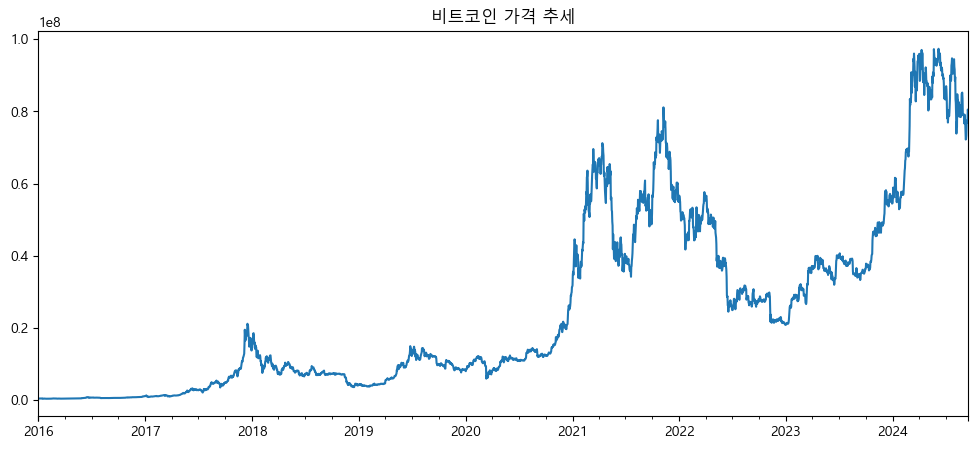

In [32]:
#비트코인 원화 가격 (빗썸), 2016~현재
df = fdr.DataReader('BTC/KRW', '2016')
df['Close'].plot()
plt.title("비트코인 가격 추세");